<a href="https://colab.research.google.com/github/natihbernan/ucldrawsimulation/blob/main/UCL_Round_of_16_Drawing_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

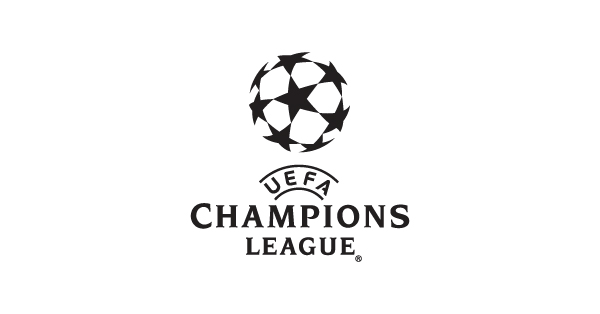

# **UEFA Champions League Round of 16 Draw**
## **2020/2021**
### **December 14th, 2020**

> Notebook by: Natih Bernan

In [ ]:
#@title Import Library
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#@title Upload Team Data

from google.colab import files
uploaded = files.upload()

Team data can be downloaded here

https://bit.ly/UCLRoundof16

In [ ]:
#@title View Team Data

all_teams = pd.read_csv('UCL_roundof16.csv')
all_teams_base = all_teams

first_team = [''] * 8
vs = ['vs'] * 8
second_team = [''] * 8
fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})
completed_fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})

pos_opp = [[]] * 16
num_pos_opp = [0] *16
picked = [False] * 16
all_teams['Possible Opponents'] = pos_opp
all_teams['Number of Possible Opponents'] = num_pos_opp
all_teams['Picked'] = picked

for i in range(16):
  all_teams['Possible Opponents'][i] = []
  for j in range(16):
    if (all_teams['Seeded'][i] != all_teams['Seeded'][j]) & (all_teams['Country'][i] != all_teams['Country'][j]) & (all_teams['Group'][i] != all_teams['Group'][j]):
       all_teams['Possible Opponents'][i].append(all_teams['Abbreviation'][j])
  
  all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

m = 0

all_teams

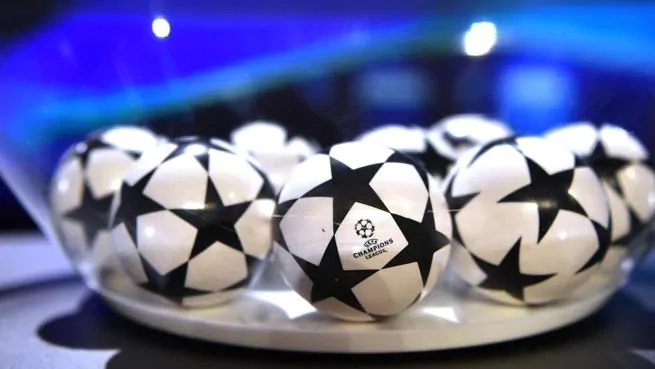

### Drawing Process

Steps:


1.   Pick ball for the first team
2.   Pick ball for the second team
3.   Check implied fixtures <br>
     a. If there is no implied fixtures, repeat step 1, 2, and 3 <br>
     b. If there is implied fixtures, repeat step 3 <br>
     c. If the drawing is done, move to step 4
4.   View fixtures
5.   Done!

NB: 
*   You may check "View Fixtures" and "Remaining Teams" during the drawing process
*   Click "Reset All" if you want to restart the draw



In [ ]:
#@title Pick Ball for the First Team

seeded_teams_left = len(all_teams[(all_teams['Seeded'] == True) & (all_teams['Picked'] == False)])
if seeded_teams_left == 0:
  print('Drawing done. If you want to restart the draw please click "Reset All"')
else:
  first = random.randint(0, seeded_teams_left - 1)
  fixtures['First Team'][m] = all_teams['Abbreviation'][first]
  all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

  display(fixtures.loc[[m]])

In [ ]:
#@title Pick Ball for the Second Team

if m > 7:
  print('Drawing done. If you want to restart the draw please click "Reset All"')
elif fixtures['First Team'][m] == '':
  print('Pick the first ball first!')
else:
  second = random.randint(0, all_teams['Number of Possible Opponents'][first] - 1)
  fixtures['Second Team'][m] = all_teams['Possible Opponents'][first][second]
  all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

  all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)

  for i in range(len(all_teams)):
    if fixtures['First Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['First Team'][m])
    if fixtures['Second Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['Second Team'][m])
    all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

  m += 1

  display(fixtures.loc[[m-1]])

In [ ]:
#@title Check Implied Fixtures

if len(all_teams) == 0:
  print('Drawing done')
elif min(all_teams['Number of Possible Opponents']) > 1:
  print('No implied fixtures. Continue picking ball for the first team')
elif min(all_teams['Number of Possible Opponents']) == 0:
  print('Error occurred. Please reset the draw')
else:
  team_index = all_teams[all_teams['Number of Possible Opponents'] == 1].index[0]
  if all_teams['Seeded'][team_index] == True:
    first = team_index
    fixtures['First Team'][m] = all_teams['Abbreviation'][first]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

    second = random.randint(0, all_teams['Number of Possible Opponents'][first] - 1)
    fixtures['Second Team'][m] = all_teams['Possible Opponents'][first][second]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

    all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)
  else:
    second = team_index
    fixtures['Second Team'][m] = all_teams['Abbreviation'][second]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

    fixtures['First Team'][m] = all_teams['Possible Opponents'][second][0]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

    all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)

  for i in range(len(all_teams)):
    if fixtures['First Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['First Team'][m])
    if fixtures['Second Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['Second Team'][m])
    all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

  m += 1

  print('There is an implied fixture. Please check again')
  display(fixtures.loc[[m-1]])


In [ ]:
#@title View Fixtures

for i in range(len(fixtures)):
  for j in range (len(all_teams_base)):
    if fixtures['First Team'][i] == all_teams_base['Abbreviation'][j]:
      completed_fixtures['First Team'][i] = all_teams_base['Team Name'][j] + ' (' + all_teams_base['Country'][j] + ')'
    if fixtures['Second Team'][i] == all_teams_base['Abbreviation'][j]:
      completed_fixtures['Second Team'][i] = all_teams_base['Team Name'][j] + ' (' + all_teams_base['Country'][j] + ')'

completed_fixtures

In [ ]:
#@title Remaining Teams

if len(all_teams) == 0:
  print('Drawing done. No team remaining. If you want to restart the draw please click "Reset All"')
else:
  display(all_teams)

In [ ]:
#@title Reset All

all_teams = pd.read_csv('UCL_roundof16.csv')
all_teams_base = all_teams

first_team = [''] * 8
vs = ['vs'] * 8
second_team = [''] * 8
fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})
completed_fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})

pos_opp = [[]] * 16
num_pos_opp = [0] *16
picked = [False] * 16
all_teams['Possible Opponents'] = pos_opp
all_teams['Number of Possible Opponents'] = num_pos_opp
all_teams['Picked'] = picked

for i in range(16):
  all_teams['Possible Opponents'][i] = []
  for j in range(16):
    if (all_teams['Seeded'][i] != all_teams['Seeded'][j]) & (all_teams['Country'][i] != all_teams['Country'][j]) & (all_teams['Group'][i] != all_teams['Group'][j]):
       all_teams['Possible Opponents'][i].append(all_teams['Abbreviation'][j])
  
  all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

m = 0



---

---

---

---

---











## **Do Multiple Simulations**

Please click on "Reset All" before you start

In [ ]:
#@title How many simulations do you want?

n = int(input())

In [ ]:
#@title Run Simulation

def reset_all():

  all_teams = pd.read_csv('UCL_roundof16.csv')
  all_teams_base = all_teams

  first_team = [''] * 8
  vs = ['vs'] * 8
  second_team = [''] * 8
  fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})
  completed_fixtures = pd.DataFrame({'First Team': first_team, 'vs': vs, 'Second Team': second_team})

  pos_opp = [[]] * 16
  num_pos_opp = [0] *16
  picked = [False] * 16
  all_teams['Possible Opponents'] = pos_opp
  all_teams['Number of Possible Opponents'] = num_pos_opp
  all_teams['Picked'] = picked

  for i in range(16):
    all_teams['Possible Opponents'][i] = []
    for j in range(16):
      if (all_teams['Seeded'][i] != all_teams['Seeded'][j]) & (all_teams['Country'][i] != all_teams['Country'][j]) & (all_teams['Group'][i] != all_teams['Group'][j]):
         all_teams['Possible Opponents'][i].append(all_teams['Abbreviation'][j])
  
    all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

  m = 0

  return all_teams

def first_ball(all_teams, m):

  seeded_teams_left = len(all_teams[(all_teams['Seeded'] == True) & (all_teams['Picked'] == False)])
  if seeded_teams_left > 0:
    first = random.randint(0, seeded_teams_left - 1)
    fixtures['First Team'][m] = all_teams['Abbreviation'][first]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

    return first

def second_ball(all_teams, m, first):

  if m <= 7:
    second = random.randint(0, all_teams['Number of Possible Opponents'][first] - 1)
    fixtures['Second Team'][m] = all_teams['Possible Opponents'][first][second]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

    all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)

    for i in range(len(all_teams)):
      if fixtures['First Team'][m] in all_teams['Possible Opponents'][i]:
        all_teams['Possible Opponents'][i].remove(fixtures['First Team'][m])
      if fixtures['Second Team'][m] in all_teams['Possible Opponents'][i]:
        all_teams['Possible Opponents'][i].remove(fixtures['Second Team'][m])
      all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])

    return all_teams

def each_round_draw(all_teams, m):
  f = first_ball(all_teams, m)
  all_teams = second_ball(all_teams, m, f)
  return all_teams

def check_implies(all_teams, m):
  team_index = all_teams[all_teams['Number of Possible Opponents'] == 1].index[0]
  if all_teams['Seeded'][team_index] == True:
    first = team_index
    fixtures['First Team'][m] = all_teams['Abbreviation'][first]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

    second = random.randint(0, all_teams['Number of Possible Opponents'][first] - 1)
    fixtures['Second Team'][m] = all_teams['Possible Opponents'][first][second]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

    all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)
  else:
    second = team_index
    fixtures['Second Team'][m] = all_teams['Abbreviation'][second]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['Second Team'][m]] = True

    fixtures['First Team'][m] = all_teams['Possible Opponents'][second][0]
    all_teams['Picked'][all_teams['Abbreviation'] == fixtures['First Team'][m]] = True

    all_teams = all_teams[all_teams['Picked'] == False].reset_index(drop = True)

  for i in range(len(all_teams)):
    if fixtures['First Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['First Team'][m])
    if fixtures['Second Team'][m] in all_teams['Possible Opponents'][i]:
      all_teams['Possible Opponents'][i].remove(fixtures['Second Team'][m])
    all_teams['Number of Possible Opponents'][i] = len(all_teams['Possible Opponents'][i])
  
    return all_teams
    
def one_simulation(all_teams):
  m = 0
  while m < 8:
    try:
      all_teams = each_round_draw(all_teams, m)
      m += 1
      if (min(all_teams['Number of Possible Opponents']) == 1):
        while (min(all_teams['Number of Possible Opponents']) == 1) & (len(all_teams) > 2):
            all_teams = check_implies(all_teams, m)
            m += 1
        if len(all_teams) == 2:
          fixtures['First Team'][7] == all_teams['Abbreviation'][0]
          fixtures['Second Team'][7] == all_teams['Abbreviation'][1]
    except:
      m = 8
  return fixtures

def multiple_simulation(all_teams, n):
  x = np.zeros((8,8))
  df = pd.DataFrame(x, columns = ['ATM', 'BMG', 'FCP', 'ATA', 'SEV', 'LAZ', 'BAR', 'RBL'], 
                       index   = ['BAY', 'RMA', 'MCI', 'LIV', 'CHE', 'BVB', 'JUV', 'PSG'])
  for i in range(n):
    all_teams = reset_all()
    fixtures = one_simulation(all_teams)
    for k in range(8):
      k_first = fixtures['First Team'][k]
      k_second = fixtures['Second Team'][k]
      index_first = all_teams_base[all_teams_base['Abbreviation'] == k_first].index[0]
      if k_second in all_teams_base['Possible Opponents'][index_first]:
        df.loc[k_first][k_second] += 1
      else:
        n -= 1
      
  df = df/n
  sns.heatmap(df, annot=True, fmt = '.2f')

print('This might take a while, depends on the number of simulations')
multiple_simulation(all_teams, n)